# # Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

data = pd.read_csv("Electric_Vehicle_Population_Data.csv")
data.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
5,JHMZC5F1XJ,Thurston,Olympia,WA,98506.0,2018,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,22.0,153785726,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
6,3FA6P0PU1G,Thurston,Tumwater,WA,98501.0,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22.0,347508836,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
7,WA1F2AFY8P,Thurston,Lacey,WA,98516.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,227213871,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
8,1FADP5CU0E,Thurston,Rochester,WA,98579.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,20.0,229811151,POINT (-123.08743 46.82175),PUGET SOUND ENERGY INC,5.306701e+10
9,5YJSA1CP1D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26.0,164768075,POINT (-122.66122 47.56573),PUGET SOUND ENERGY INC,5.303508e+10


In [2]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [3]:
data["Model"].unique()

array(['MODEL X', 'CLARITY', 'MODEL 3', 'LEAF', 'MODEL S', 'FUSION',
       'Q5 E', 'C-MAX', 'MODEL Y', 'NIRO', 'VOLT', 'BOLT EV', 'FORTWO',
       'X5', 'SORENTO', 'PRIUS PRIME', 'I3', 'WRANGLER', 'SPARK', '500',
       'XC60', 'XC90', 'FOCUS', 'SOUL EV', 'A3', 'PACIFICA', 'OPTIMA',
       'NX', 'PRIUS PLUG-IN', 'MUSTANG MACH-E', 'BOLT EUV', 'CAYENNE',
       'ELR', 'X3', 'KONA ELECTRIC', '530E', 'EQB-CLASS', 'R1T',
       'TRANSIT', 'E-GOLF', 'ID.4', 'FORTWO ELECTRIC DRIVE', 'I-PACE',
       'AVIATOR', 'TAYCAN', 'E-TRON', 'C-CLASS', 'OUTLANDER', 'SOUL',
       'SONATA', 'GRAND CHEROKEE', 'RAV4 PRIME', 'SPORTAGE', 'IONIQ 5',
       'EV6', 'EQS-CLASS SEDAN', 'R1S', 'IX', 'KONA', 'I8', '330E',
       'COUNTRYMAN', nan, 'S60', 'F-150', 'XC40', 'IONIQ', 'Q5',
       'GLE-CLASS', 'HARDTOP', 'ESCAPE', 'I4', 'B-CLASS', 'IONIQ 6',
       'SANTA FE', 'ROADSTER', 'PS2', 'RAV4', 'PANAMERA', 'GLC-CLASS',
       'Q4', 'C40', 'CORSAIR', 'S90', 'I-MIEV', 'GV60', 'E-TRON GT',
       'CROSSTREK', 'SOL

In [4]:
data['Model'].value_counts()

MODEL 3        25311
MODEL Y        22078
LEAF           12961
MODEL S         7399
BOLT EV         5335
               ...  
745LE              2
BENTAYGA           2
918                1
FLYING SPUR        1
S-10 PICKUP        1
Name: Model, Length: 121, dtype: int64

In [5]:
frequency_table = data["Model"].value_counts()


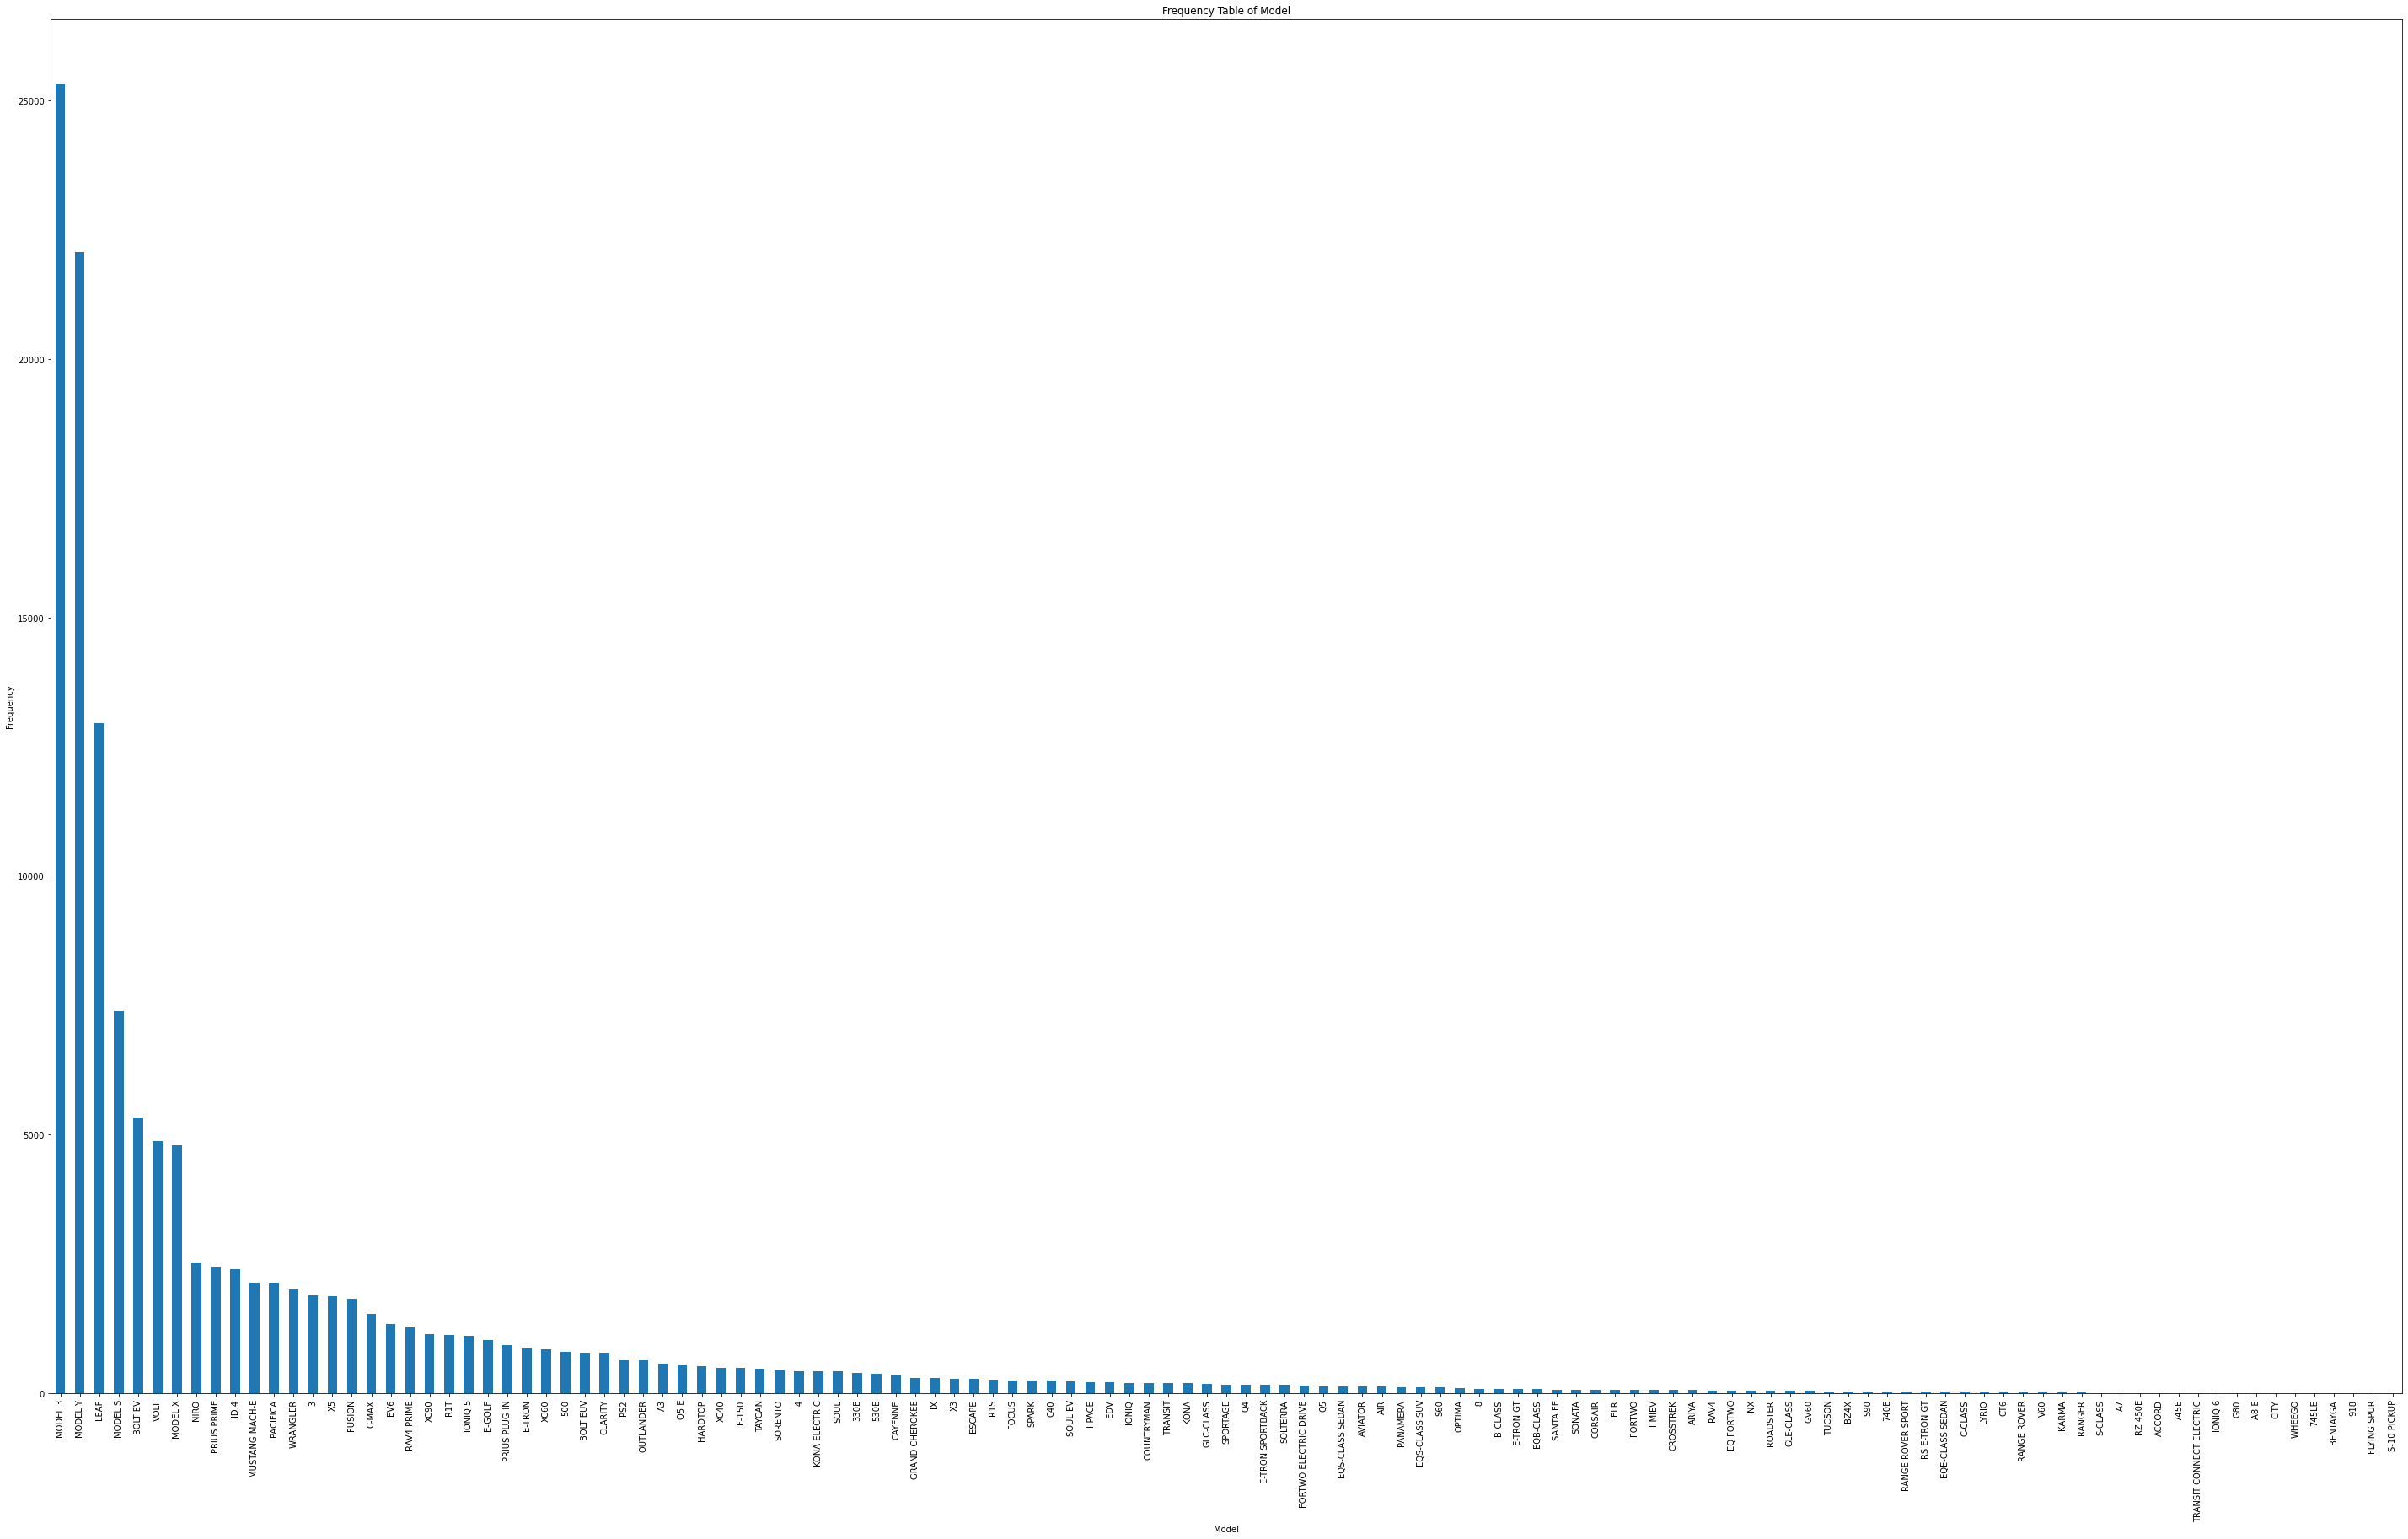

In [6]:
frequency_table = frequency_table.sort_values(ascending=False)

plt.figure(figsize=(50, 30))  # Optional: adjust the figure size

frequency_table.plot(kind='bar')
plt.xlabel("Model")
plt.ylabel('Frequency')
plt.title('Frequency Table of {}'.format("Model"))
plt.show()


In [7]:

import pandas as pd

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

# Filter the cars that do not qualify for clean alternative fuel vehicle status
non_cafv_cars = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].str.contains("Not eligible")]

# Retrieve the cars and their types
non_cafv_cars_data = non_cafv_cars[["VIN (1-10)", "Model"]]

# Display the result
print(non_cafv_cars_data)


        VIN (1-10)        Model
6       3FA6P0PU1G       FUSION
7       WA1F2AFY8P         Q5 E
8       1FADP5CU0E        C-MAX
14      1FADP5FU4H        C-MAX
15      KNDCM3LD8L         NIRO
...            ...          ...
130377  WBAJA9C55K         530E
130385  WAUUPBFF2G           A3
130390  1C4JJXR65P     WRANGLER
130407  JTDKARFP1H  PRIUS PRIME
130437  WBA13AG06M         530E

[16446 rows x 2 columns]


In [8]:

# Filter the Tesla cars made in Bothell City
tesla_bothell_cars = df[(df["Make"] == "TESLA") & (df["City"] == "Bothell")]

# Retrieve the desired columns
tesla_bothell_cars_data = tesla_bothell_cars[["Model Year", "Model"]]

# Display the result
print(tesla_bothell_cars_data)


        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


In [9]:
#Get all the cars that have an electric range of more than 100, and were made after 2015

# Filter the cars with an electric range greater than 100 and made after 2015
filtered_cars = df[(df["Electric Range"] > 100) & (df["Model Year"] > 2015)]

# Display the result
print(filtered_cars)
filtered_cars.head()


        VIN (1-10)    County           City State  Postal Code  Model Year  \
0       5YJXCAE26J    Yakima         Yakima    WA      98908.0        2018   
2       5YJ3E1EB0K      King        Seattle    WA      98199.0        2019   
4       5YJSA1E21H  Thurston          Lacey    WA      98516.0        2017   
12      5YJ3E1EC7L  Thurston          Lacey    WA      98503.0        2020   
13      5YJ3E1EB2L  Thurston        Olympia    WA      98516.0        2020   
...            ...       ...            ...   ...          ...         ...   
130417  5YJYGDEE5L    Pierce         Tacoma    WA      98444.0        2020   
130428  1N4AZ1CP0J   Clallam         Sequim    WA      98382.0        2018   
130432  5YJYGDEEXL      King         Vashon    WA      98070.0        2020   
130436  5YJ3E1EB0J   Whatcom         Blaine    WA      98230.0        2018   
130441  5YJXCBE22L    Island  Camano Island    WA      98282.0        2020   

          Make    Model           Electric Vehicle Type  \
0   

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


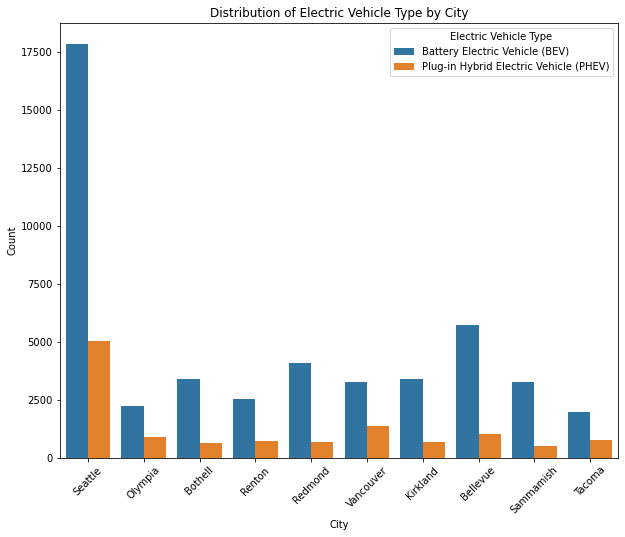

In [10]:
top_ten_cities = df["City"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top ten cities
filtered_df = df[df["City"].isin(top_ten_cities)]


#Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(10, 8))   #adjust the figure size
sns.countplot(data=filtered_df, x="City", hue="Electric Vehicle Type")
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Distribution of Electric Vehicle Type by City")
plt.legend(title="Electric Vehicle Type")
plt.xticks(rotation=45)
plt.show()

Filter the DataFrame to include only the top ten cities

# Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code

2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [16]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
nltk.download('punkt')


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [24]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

In [25]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag

def count_pos_tags(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    
    # Initialize counts for verbs, nouns, pronouns, and adjectives
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0
    
    # Iterate over each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        words = word_tokenize(sentence)
        
        # Perform part-of-speech tagging
        tagged_words = pos_tag(words)
        
        # Count the number of verbs, nouns, pronouns, and adjectives
        for word, tag in tagged_words:
            if tag.startswith('V'):  # Verbs
                verb_count += 1
            elif tag.startswith('N'):  # Nouns
                noun_count += 1
            elif tag == 'PRP' or tag == 'PRP$':  # Pronouns
                pronoun_count += 1
            elif tag.startswith('JJ'):  # Adjectives
                adjective_count += 1
    
    # Return the counts as a dictionary
    pos_counts = {
        'verbs': verb_count,
        'nouns': noun_count,
        'pronouns': pronoun_count,
        'adjectives': adjective_count
    }
    
    return pos_counts

# Test cases
text1 = "I love eating pizza."
text2 = "The cat sat on the mat, and it was fluffy."

# Count the part-of-speech tags in the given texts
result1 = count_pos_tags(text1)
result2 = count_pos_tags(text2)

# Print the results
print("Count of part-of-speech tags in text 1:")
print(result1)
print()
print("Count of part-of-speech tags in text 2:")
print(result2)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\jyoti/nltk_data'
    - 'C:\\Users\\jyoti\\anaconda3\\nltk_data'
    - 'C:\\Users\\jyoti\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\jyoti\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\jyoti\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - '<path_to_data_directory>'
    - ''
**********************************************************************
